In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import psycopg2
%load_ext sql
from sqlalchemy import create_engine

In [2]:
df = pd.read_csv('No_null_values.csv', index_col=[0])

In [3]:
df.T

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311,68a861fd-0d20-4e51-a587-8a90407ee574,2b451d12-6c2b-4cea-a295-ba1d6bced078,6630d501-838c-4be4-a59c-6f58c814ed6a,70ddaa89-b726-49dc-9022-2d655e4c7936,05a49ee3-8fd5-453a-a5f3-82b6cd986856,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,...,89d0d064-307e-4f21-a5b4-6ec1137c8bfc,24f1d865-3d58-495f-9dc9-b5927a1fd40a,ce7abedd-6437-4609-9123-8a4a8234381e,3f3c716b-fd57-40f2-8a58-d944efcf1fd5,c60df12b-a50b-4397-ae57-98381a0d3960,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,6e96b921-0c09-4993-bbda-a1ac6411061a,e8307ddf-9a01-4fff-bc59-4742e03fd24f,3775ccfc-0052-4107-81ae-9657f81ecdf3,9de5fb6e-bd33-4995-aec8-f01d0172a499
City,Point Baker,West Branch,Yamhill,Del Mar,Needville,Fort Valley,Pioneer,Oklahoma City,Saint Cloud,Cincinnati,...,Gilmore City,Smyrna,Haubstadt,Machias,West Kill,Mount Holly,Clarksville,Mobeetie,Carrollton,Clarkesville
State,AK,MI,OR,CA,TX,GA,TN,OK,FL,OH,...,IA,NY,IN,ME,NY,VT,TN,TX,GA,GA
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego,Fort Bend,Peach,Scott,Oklahoma,Osceola,Hamilton,...,Humboldt,Chenango,Gibson,Washington,Greene,Rutland,Montgomery,Wheeler,Carroll,Habersham
Zip,99927,48661,97148,92014,77461,31030,37847,73109,34771,45237,...,50541,13464,47639,4654,12492,5758,37042,79061,30117,30523
Lat,56.251,44.32893,45.35589,32.96687,29.38012,32.57032,36.4342,35.43313,28.27646,39.19296,...,42.71548,42.68582,38.17985,44.77104,42.18491,43.43391,36.56907,35.52039,33.58016,34.70783
Lng,-133.37571,-84.2408,-123.24657,-117.24798,-95.80673,-83.8904,-84.27892,-97.52463,-81.16273,-84.4523,...,-94.44913,-75.61754,-87.57497,-67.55341,-74.33574,-72.78734,-87.41694,-100.4418,-85.13241,-83.53648
Population,38,10446,3735,13863,11352,17701,2535,23144,17351,20193,...,836,1378,4261,3209,210,640,77168,406,35575,12230
Area,Urban,Urban,Urban,Suburban,Suburban,Urban,Suburban,Suburban,Suburban,Rural,...,Rural,Rural,Suburban,Rural,Urban,Rural,Rural,Rural,Urban,Urban
Timezone,America/Sitka,America/Detroit,America/Los_Angeles,America/Los_Angeles,America/Chicago,America/New_York,America/New_York,America/Chicago,America/New_York,America/New_York,...,America/Chicago,America/New_York,America/Chicago,America/New_York,America/New_York,America/New_York,America/Chicago,America/Chicago,America/New_York,America/New_York


In [4]:
df['Churn'].replace(['Yes', 'No'], [1,0], inplace=True)

In [5]:
df['Churn'].value_counts(normalize=True)

0    0.735
1    0.265
Name: Churn, dtype: float64

In [6]:
for key, values in df.items():
    if pd.api.types.is_numeric_dtype(values):
        print(key)

Zip
Lat
Lng
Population
Children
Age
Income
Churn
Outage_sec_perweek
Email
Contacts
Yearly_equip_failure
Techie
Phone
TechSupport
Tenure
MonthlyCharge
Bandwidth_GB_Year
item1
item2
item3
item4
item5
item6
item7
item8
AgeIs_missing
Techieis_missing
Phoneis_missing
TechSupportis_missing
Tenure_is_missing
Bandwidth_GB_YearIs_missing


In [7]:
numeric_values_to_test = ['Population', 'Children', 'Age', 'Income', 
                          'Outage_sec_perweek', 'Email', 'Contacts' 
                          'Yearly_equip_failure', 'Techie',  'Phone',
                          'TechSupport', 'Tenure', 'MonthlyCharge',
                          'Bandwidth_GB_Year', 'item1', 'item2',
                          'item3', 'item4', 'item5', 'item6', 'item7',
                          'item8']

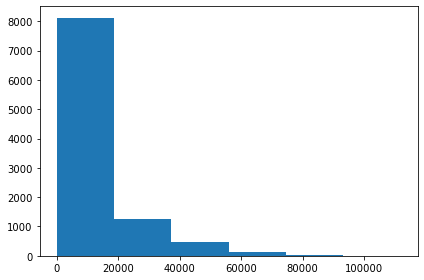

In [8]:
plt.hist(df.Population, bins=6)
plt.tight_layout()

In [9]:
df.Population.describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [10]:
df.loc[(df.Population <= 0)]

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,...,item5,item6,item7,item8,AgeIs_missing,Techieis_missing,Phoneis_missing,TechSupportis_missing,Tenure_is_missing,Bandwidth_GB_YearIs_missing
14,780992d3-d758-4152-aceb-5d59edda3d15,East Livermore,ME,Androscoggin,4228,44.43256,-70.11501,0,Urban,America/New_York,...,4,5,4,4,True,False,False,False,False,False
423,6f219638-1792-46b8-becb-c00fb17d13c1,Warren,MI,Macomb,48397,42.49501,-83.04105,0,Urban,America/Detroit,...,4,4,4,2,True,False,False,False,True,False
429,bc830a77-6237-4a32-b93f-69a86e5e4ff9,Bayside,NY,Queens,11359,40.79142,-73.77665,0,Suburban,America/New_York,...,4,6,4,3,True,False,False,False,False,False
435,13fa5f95-d4d8-4901-acd9-a77c35b8e512,Memphis,TN,Shelby,38132,35.07131,-90.00136,0,Urban,America/Chicago,...,3,5,4,4,False,False,False,False,False,False
447,824f1894-19c9-42aa-8760-bc30fd3f6cdb,Caroleen,NC,Rutherford,28019,35.28035,-81.79052,0,Urban,America/New_York,...,5,5,5,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,ab4e0ff2-636f-4c0b-83e9-cddc9b8bad37,Memphis,TN,Shelby,38131,35.06631,-89.99205,0,Suburban,America/Chicago,...,4,3,4,3,True,False,False,False,False,False
9442,20fcd6b4-4ff8-4640-bc9b-2e70ff17cff5,New York,NY,New York,10152,40.75840,-73.97203,0,Suburban,America/New_York,...,2,4,3,4,False,False,False,False,False,False
9658,aea4abf3-99a6-45f3-b42d-5ca7fb01711f,Oak Island,MN,Lake of the Woods,56741,49.28436,-94.85821,0,Rural,America/Chicago,...,4,4,3,2,False,True,False,False,False,False
9703,aed46bda-ec9b-4999-af74-0e4945b49e27,Vidalia,GA,Toombs,30475,32.22467,-82.36845,0,Suburban,America/New_York,...,2,3,3,4,True,False,True,False,False,False


In [11]:

for key, values in df.items():
    if pd.api.types.is_numeric_dtype(values):
        df 

In [12]:
df

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,...,item5,item6,item7,item8,AgeIs_missing,Techieis_missing,Phoneis_missing,TechSupportis_missing,Tenure_is_missing,Bandwidth_GB_YearIs_missing
1,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,...,4,4,3,4,False,False,False,False,False,False
2,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,...,4,3,4,4,False,False,False,False,False,False
3,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,...,4,3,3,3,False,False,False,False,False,False
4,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,...,5,4,3,3,False,False,False,False,False,False
5,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,...,4,4,4,5,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,...,4,3,2,3,True,True,True,False,False,False
9997,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,...,4,5,2,5,False,True,True,False,False,False
9998,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,...,4,4,4,5,True,False,False,False,True,False
9999,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,...,3,3,5,4,False,False,False,False,False,False


In [13]:
df.isna().sum()

Interaction                    0
City                           0
State                          0
County                         0
Zip                            0
Lat                            0
Lng                            0
Population                     0
Area                           0
Timezone                       0
Job                            0
Children                       0
Age                            0
Education                      0
Employment                     0
Income                         0
Marital                        0
Gender                         0
Churn                          0
Outage_sec_perweek             0
Email                          0
Contacts                       0
Yearly_equip_failure           0
Techie                         0
Contract                       0
Port_modem                     0
Tablet                         0
InternetService                0
Phone                          0
Multiple                       0
OnlineSecu

In [14]:
data = df.loc[:,['Population', 'Children', 'Age', 'Income',
                 'Outage_sec_perweek','Email', 'Contacts',
                 'Yearly_equip_failure', 'Tenure',
                 'MonthlyCharge','Bandwidth_GB_Year']]

In [15]:
data

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,38,2.0,68.0,28561.990000,6.972566,10,0,1,6.795513,171.449762,904.536110
2,10446,1.0,27.0,21704.770000,12.014541,12,0,1,1.156681,242.948015,800.982766
3,3735,4.0,50.0,36028.798176,10.245616,9,0,1,15.754144,159.440398,2054.706961
4,13863,1.0,48.0,18925.230000,15.206193,15,2,0,17.087227,120.249493,2164.579412
5,11352,0.0,83.0,40074.190000,8.960316,16,2,1,1.670972,150.761216,271.493436
...,...,...,...,...,...,...,...,...,...,...,...
9996,640,3.0,53.0,55723.740000,9.265392,12,2,0,68.197130,159.828800,6511.253000
9997,77168,4.0,48.0,36028.798176,8.115849,15,2,0,61.040370,208.856400,5695.952000
9998,406,2.0,53.0,36028.798176,4.837696,10,0,0,37.780000,168.220900,4159.306000
9999,35575,1.0,39.0,16667.580000,12.076460,14,1,0,71.095600,252.628600,6468.457000


In [16]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler

In [17]:
trans = RobustScaler()
data = trans.fit_transform(data)

dataset = pd.DataFrame(data)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.550769,0.036000,0.008646,0.137148,2.819715e-01,0.004000,-0.002900,0.398000,-0.063862,0.066355,-0.000040
std,1.161118,0.933564,0.750144,1.127431,1.584813e+00,0.756475,0.494233,0.635953,0.490310,0.691086,0.498949
min,-0.234151,-1.000000,-1.458333,-1.615506,-2.605625e+00,-2.750000,-0.500000,0.000000,-0.714820,-1.473697,-0.780790
25%,-0.174779,-0.500000,-0.500000,-0.566213,-4.846374e-01,-0.500000,-0.500000,0.000000,-0.565168,-0.459990,-0.502364
50%,0.000000,0.000000,0.000000,0.000000,-2.003335e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.825221,0.500000,0.500000,0.433787,5.153626e-01,0.500000,0.500000,1.000000,0.434832,0.540010,0.497636
max,8.764240,4.000000,1.500000,10.203168,8.311311e+00,2.750000,3.000000,6.000000,0.665057,2.327726,0.905107


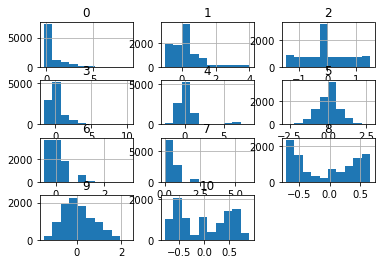

<Figure size 432x288 with 0 Axes>

In [18]:
dataset.hist()
plt.show()
plt.tight_layout()

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=3)
pca.fit(dataset)
principalComponents = pca.fit_transform(dataset)
principal_df = pd.DataFrame(data = principalComponents)

In [21]:
principal_df

,0,1,2
0,-1.016317,-0.778149,-0.509215
1,0.205861,0.106141,-0.813732
2,-0.284130,-0.521580,-0.123131
3,0.773914,0.421430,-0.927987
4,-0.596164,0.166009,0.013663
...,...,...,...
9995,-0.492831,-0.785051,0.744086
9996,-0.750132,5.405317,0.177428
9997,-1.494067,-0.765968,-0.159289
9998,0.212556,2.150784,-0.937327


In [22]:
principal_df.describe()

,0,1,2
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,-2.842171e-18,7.958079e-17,5.329071e-17
std,1.588167e+00,1.161452e+00,1.127551e+00
min,-2.907535e+00,-1.140503e+00,-1.808307e+00
25%,-7.654285e-01,-7.095187e-01,-7.050310e-01
50%,-2.829206e-01,-5.420317e-01,-1.593585e-01
75%,2.334064e-01,2.867968e-01,3.054291e-01
max,8.042978e+00,8.195099e+00,9.980844e+00


In [23]:
df[['Churn']]

,Churn
1,0
2,1
3,0
4,0
5,1
...,...
9996,0
9997,0
9998,0
9999,0


In [24]:
df.Churn.value_counts()

0    7350
1    2650
Name: Churn, dtype: int64

In [25]:
principal_df = principal_df.reset_index(drop=True)

In [26]:
df = df.reset_index(drop=True)

In [27]:
finaldf = pd.concat([df[['Churn']], principal_df], axis=1)

In [28]:
finaldf = pd.concat([principal_df, df[['Churn']]], join='outer', axis=1)

In [29]:
type(principal_df)

pandas.core.frame.DataFrame

In [30]:
finaldf

,0,1,2,Churn
0,-1.016317,-0.778149,-0.509215,0
1,0.205861,0.106141,-0.813732,1
2,-0.284130,-0.521580,-0.123131,0
3,0.773914,0.421430,-0.927987,0
4,-0.596164,0.166009,0.013663,1
...,...,...,...,...
9995,-0.492831,-0.785051,0.744086,0
9996,-0.750132,5.405317,0.177428,0
9997,-1.494067,-0.765968,-0.159289,0
9998,0.212556,2.150784,-0.937327,0


In [31]:
pca.explained_variance_ratio_ * 100

array([28.81578976, 15.41137116, 14.52482179])

In [32]:
pca.explained_variance_

array([2.52227315, 1.3489718 , 1.2713713 ])

In [33]:
print(abs( pca.components_[0] ))

[8.39328203e-03 1.42921279e-03 9.34892942e-03 7.86339900e-03
 9.97377691e-01 5.66603306e-03 6.17703284e-04 8.03248839e-03
 2.22025138e-03 6.98592932e-02 5.81025386e-03]


In [34]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [35]:
per_var

array([28.8, 15.4, 14.5])

In [36]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] 

In [37]:
data

array([[-0.23109413,  0.        ,  0.625     , ..., -0.60218824,
         0.024469  , -0.60048167],
       [ 0.60623492, -0.5       , -1.08333333, ..., -0.71177981,
         1.16467631, -0.62540933],
       [ 0.06633146,  1.        , -0.125     , ..., -0.42807588,
        -0.16704846, -0.3236092 ],
       ...,
       [-0.20148833,  0.        ,  0.        , ...,  0.        ,
        -0.02702278,  0.18301598],
       [ 2.62787611, -0.5       , -0.58333333, ...,  0.64749378,
         1.31905593,  0.7388815 ],
       [ 0.74975865, -0.5       , -1.04166667, ...,  0.49697358,
         0.77273817,  0.59183087]])

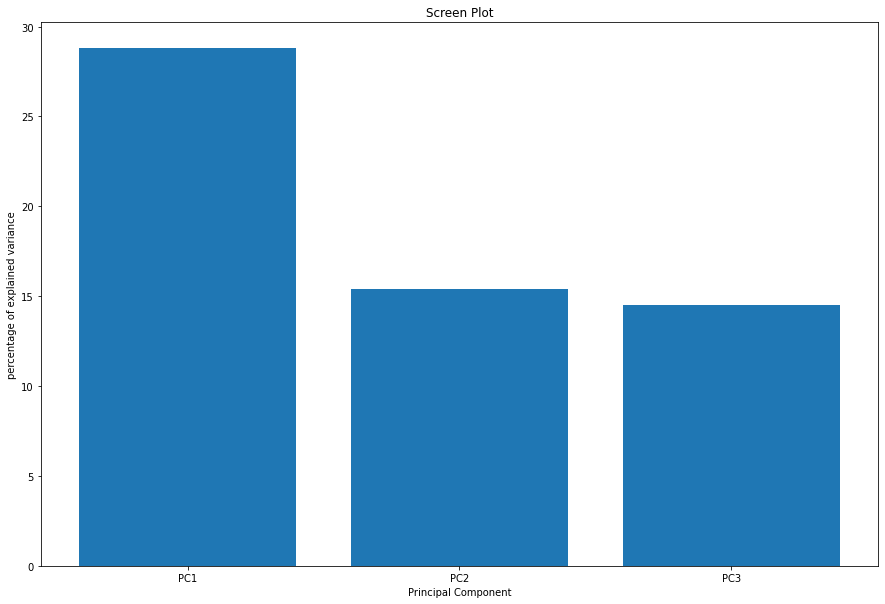

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Screen Plot')
plt.show()

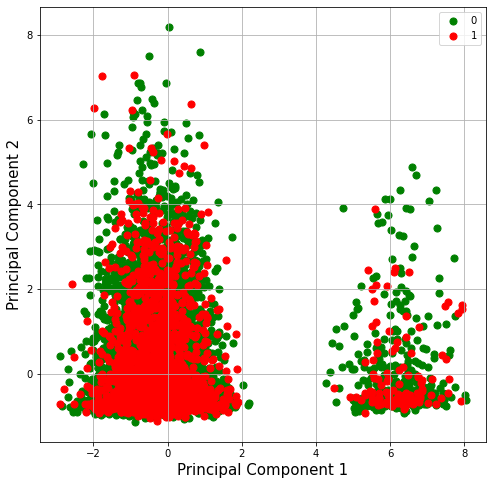

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Churn'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 0],
                 finaldf.loc[indicesToKeep, 1],
               c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [40]:
from mpl_toolkits import mplot3d

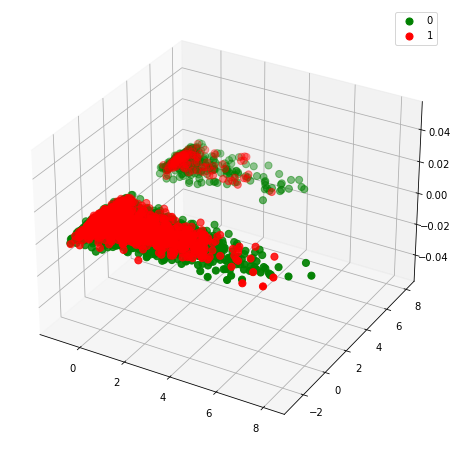

In [41]:
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection='3d')

targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Churn'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 1],
                 finaldf.loc[indicesToKeep, 0],
               c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Text(0.5, 0, 'third')

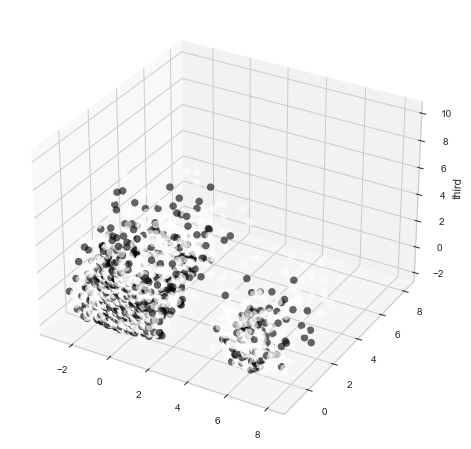

In [48]:
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(principalComponents[:, 0], principalComponents[:,1],
                    principalComponents[:,2],
                   c= df.Churn, s=50, alpha=0.6)

ax.set_zlabel('third')

In [43]:
from yellowbrick.features import PCA

In [44]:
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,-0.231094,0.0,0.625000,-0.341834,-0.728654,-0.50,-0.5,1.0,-0.602188,0.024469,-0.600482
1,0.606235,-0.5,-1.083333,-0.655760,0.408646,0.00,-0.5,1.0,-0.711780,1.164676,-0.625409
2,0.066331,1.0,-0.125000,0.000000,0.009636,-0.75,-0.5,1.0,-0.428076,-0.167048,-0.323609
3,0.881134,-0.5,-0.208333,-0.783008,1.128576,0.75,0.5,0.0,-0.402167,-0.792039,-0.297160
4,0.679123,-1.0,1.250000,0.185200,-0.280284,1.00,0.5,1.0,-0.701784,-0.305458,-0.752870
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.182663,0.5,0.000000,0.901643,-0.211470,0.00,0.5,0.0,0.591162,-0.160854,0.749183
9996,5.974055,1.0,-0.208333,0.000000,-0.470768,0.75,0.5,0.0,0.452069,0.621006,0.552922
9997,-0.201488,0.0,0.000000,0.000000,-1.210210,-0.50,-0.5,0.0,0.000000,-0.027023,0.183016
9998,2.627876,-0.5,-0.583333,-0.886365,0.422613,0.50,0.0,0.0,0.647494,1.319056,0.738882


array([[-1.62360072, -0.40539136,  0.66120935],
       [-1.72816737,  1.37294689,  0.7124806 ],
       [-0.96908171, -0.28154074,  1.802779  ],
       ...,
       [ 0.32367669, -0.80409622,  0.6129131 ],
       [ 2.13064972,  1.17553523, -1.2514421 ],
       [ 1.65754798,  0.87478725, -0.59037508]])

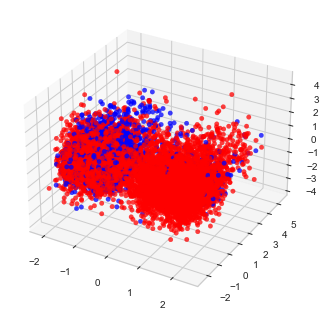

In [45]:
vis_3 = PCA(scale=True, projection=3,
           random_state=2020,
           colors=['red', 'blue'])

vis_3.fit_transform(dataset, df.Churn)


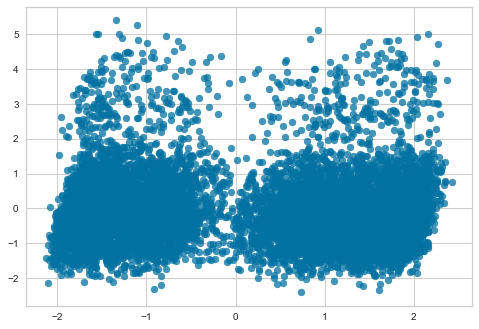

In [46]:
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(dataset)
x_pca_95 = pca_95.transform(dataset)

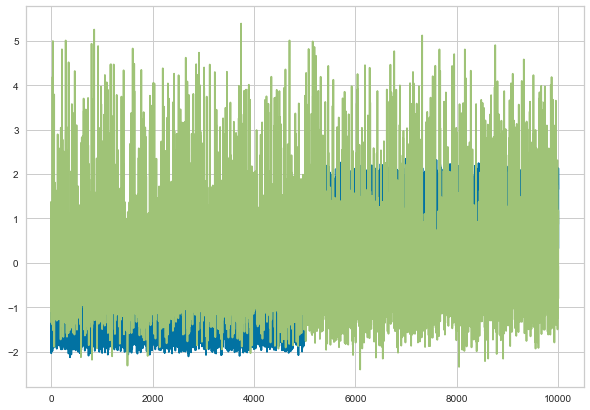

In [47]:
plt.figure(figsize=(10,7))
plt.plot(x_pca_95)